**Import all necessary libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset:**

In [3]:
df = pd.read_csv('/content/Iris Flower-dataset.csv')

# **Data Preprocessing:**

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Checking for null values:**

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# **Data Visualization:**

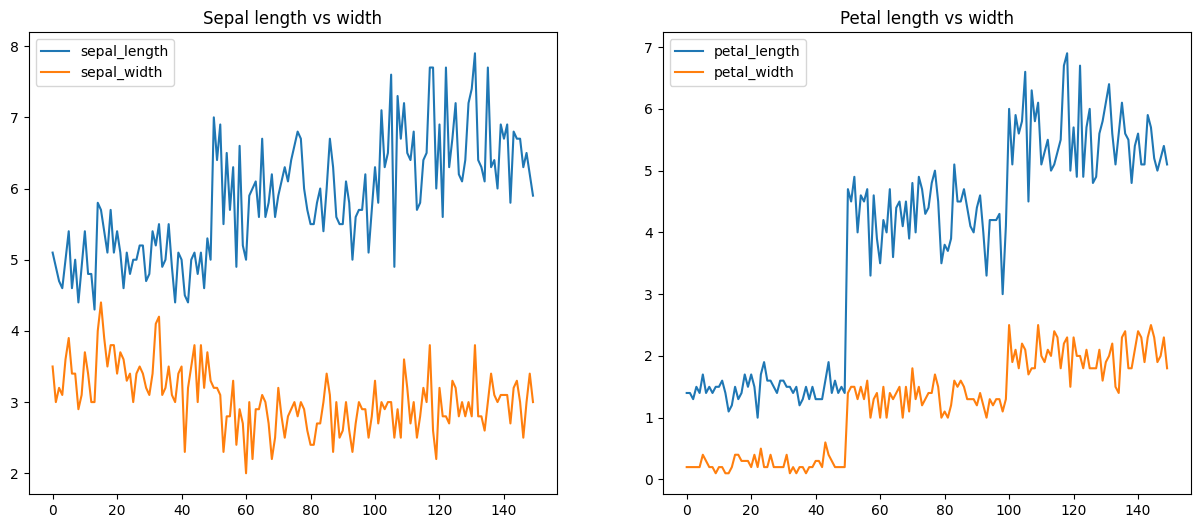

In [9]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(df['sepal_length'])
ax[0].plot(df['sepal_width'])
ax[0].set_title('Sepal length vs width')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(df['petal_length'])
ax[1].plot(df['petal_width'])
ax[1].set_title('Petal length vs width')
ax[1].legend(['petal_length','petal_width'])
plt.show()

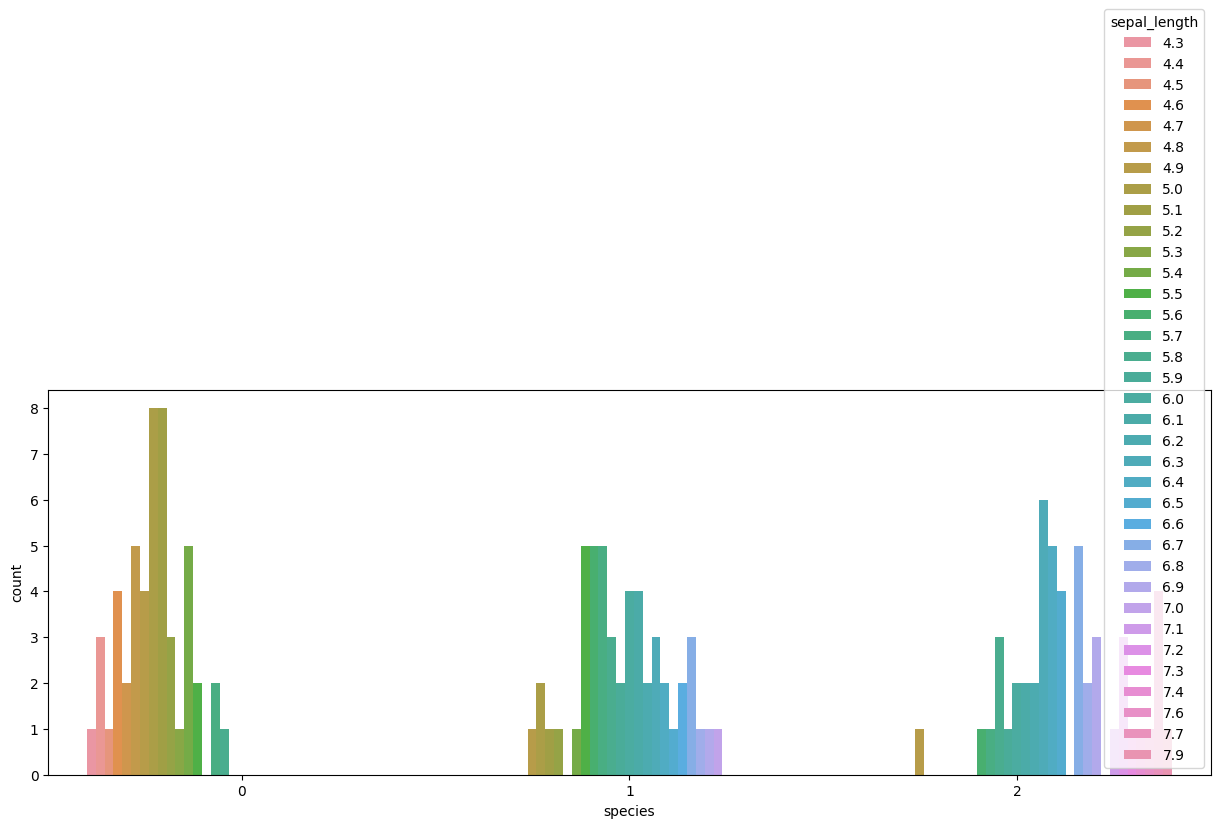

In [40]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x='species',data=df,hue='sepal_length')
plt.show()

Text(0.5, 1.0, '2. Petal Length vs. Petal Width')

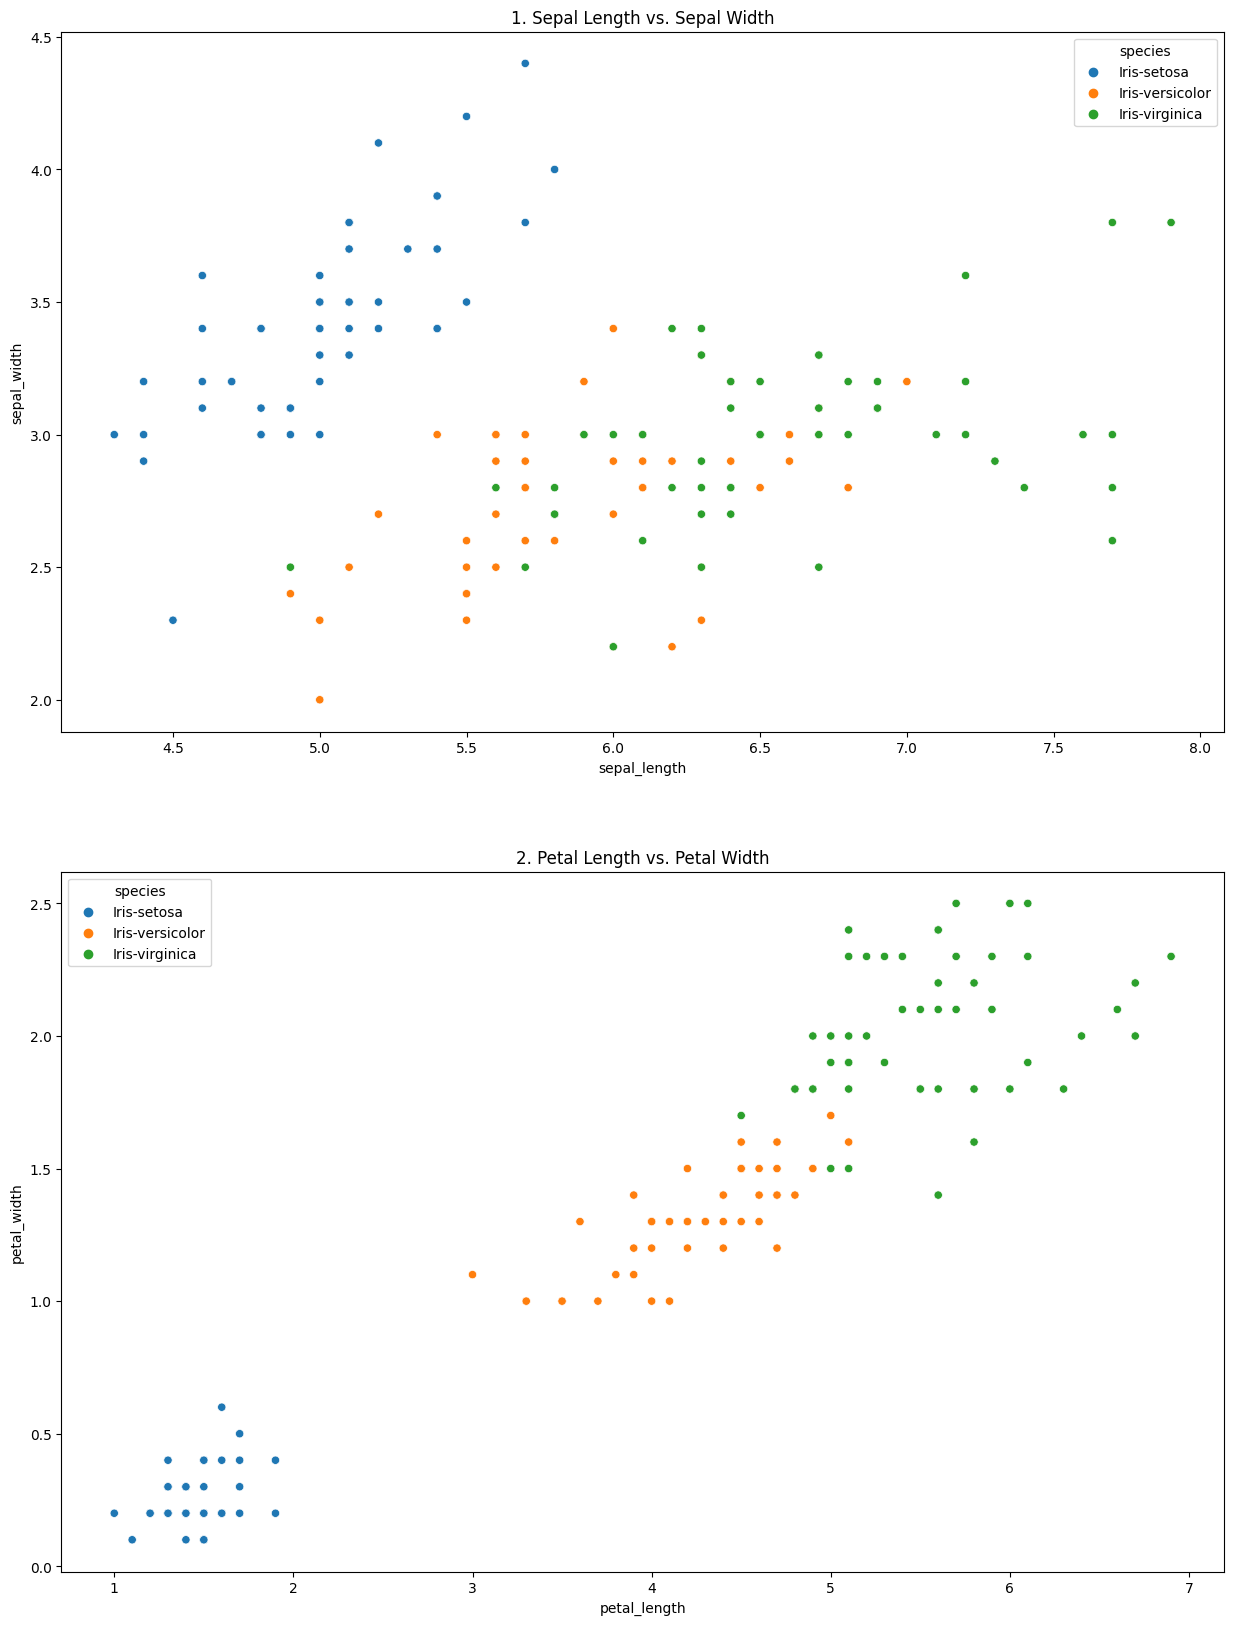

In [24]:
fig,axes = plt.subplots(2,1,figsize=(15,20))
sns.scatterplot(x='sepal_length',data=df,y='sepal_width',hue='species',ax=axes[0])
sns.scatterplot(x='petal_length',data=df,y='petal_width',hue='species',ax=axes[1])
axes[0].set_title('1. Sepal Length vs. Sepal Width')
axes[1].set_title('2. Petal Length vs. Petal Width')

# **Model Building:**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

**Apply Label Encoding:**

In [26]:
df['species'] = LabelEncoder().fit_transform(df['species'])

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Split the data into training and testing:**

In [28]:
X = df.drop(['species'],axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Creating Logistic Regression model:**

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [30]:
predictions = logmodel.predict(X_test)

In [45]:
score = accuracy_score(y_test, predictions)
print(f'Accuracy score of Logistic Regression is: {score}')

Accuracy score of Logistic Regression is: 0.9777777777777777


**Creating KNeighbors Classifier model:**

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
pred = knn.predict(X_test)

In [46]:
score2 = accuracy_score(y_test, pred)
print(f'Accuracy score of KneighborsClassifier is: {score2}')

Accuracy score of KneighborsClassifier is: 1.0


In [ ]:
%%shell
jupyter nbconvert --to html ''